# Figure 2.1: Sublinearity of 1 vs 5

In [1]:
import sys
sys.path.append("../")
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
#print(plt.style.available)
plt.style.use('seaborn-white')
matplotlib.rcParams['font.family']
print(findfont(FontProperties(family=['sans-serif'])))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [2]:
figAspect = 1.

In [3]:
n = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160617/c5/plots/c5.pkl')
# or 
# n = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160817/c2/plots/c2.pkl')
#n.features

In [6]:
feature = 0 # Area under the curve
expected, observed = [], []
for exp in n:
    for sqr in exp:
        if sqr > 1:
            if sqr == 5:
                expected, observed = zip(*[(exp[sqr].coordwise[coord].expected_feature[feature],exp[sqr].coordwise[coord].average_feature[feature]) for coord in exp[sqr].coordwise])

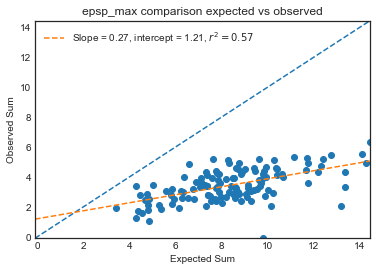

In [7]:
f, ax = plt.subplots()
ax.scatter(expected, observed)
minLim, maxLim = min(expected + observed), max(expected + observed)
ax.plot((minLim, maxLim), (minLim, maxLim),'--')
slope, intercept, r2, pval,stderr = ss.linregress(expected, observed)
expArray = np.linspace(minLim, maxLim,100)
ax.plot(expArray, slope*expArray + intercept,'--', label="Slope = {:.2f}, intercept = {:.2f}, $r^2={:.2f}$".format(slope, intercept, r2))
ax.set_xlim(minLim, maxLim)
ax.set_ylim(minLim, maxLim)
ax.set_xlabel("Expected Sum")
ax.set_ylabel("Observed Sum")
plt.legend(loc='best')
plt.title("{} comparison expected vs observed".format(n.features[feature]))
plt.figaspect(figAspect) #Length/width
plt.show()